# Classical Machine Learning

In case you do not dispose from a local environment please launch this repository from 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Talan-TechForData/datascience-solutions/HEAD?labpath=problem.ipynb) 
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Talan-TechForData/datascience-solutions/blob/main/1_exploratory_data_analysis/taxinyc_analysis/problem.ipynb)

## Situational description 

In this case we consider a classical dataset describing blood transfusions.

In [1]:
%pip install pandas matplotlib scikit-learn tensorflow seaborn

Note: you may need to restart the kernel to use updated packages.


Here's a description of the features in this dataset:

1. **age**: The age of the individual. This is a numerical feature indicating how old the person is.

2. **education-num**: The number of years of education the individual has completed. This is a numerical feature representing educational attainment.

3. **capital-gain**: The capital gains of the individual, which is a numerical feature indicating income from investment profits.

4. **capital-loss**: The capital losses of the individual, which is a numerical feature indicating losses from investments.

5. **hours-per-week**: The number of hours the individual works per week. This is a numerical feature representing workload.

6. **class**: The target variable indicating whether the individual's income exceeds $50K per year. This is a categorical feature with two possible values:
   - `<=50K`: The individual earns $50,000 or less per year.
   - `>50K`: The individual earns more than $50,000 per year.

In [2]:
import pandas as pd

adult_census = pd.read_csv(
    'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census-numeric-all.csv',
)
adult_census.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,25,7,0,0,40,<=50K
1,38,9,0,0,50,<=50K
2,28,12,0,0,40,>50K
3,44,10,7688,0,40,>50K
4,18,10,0,0,30,<=50K


1. In this case what kind of problems can be solved with this dataset via ML?

In [3]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   education-num   48842 non-null  int64 
 2   capital-gain    48842 non-null  int64 
 3   capital-loss    48842 non-null  int64 
 4   hours-per-week  48842 non-null  int64 
 5   class           48842 non-null  object
dtypes: int64(5), object(1)
memory usage: 2.2+ MB


> R: In this case we have:

1. Classification problems. By considering as feature all columns but `class`. Or instead regression problems by considering trying to predict for istance capital loss estimation based on the rest of columns.

2. Consider the following piece of code. Explain what the piece of code does and the conclusions this might bring

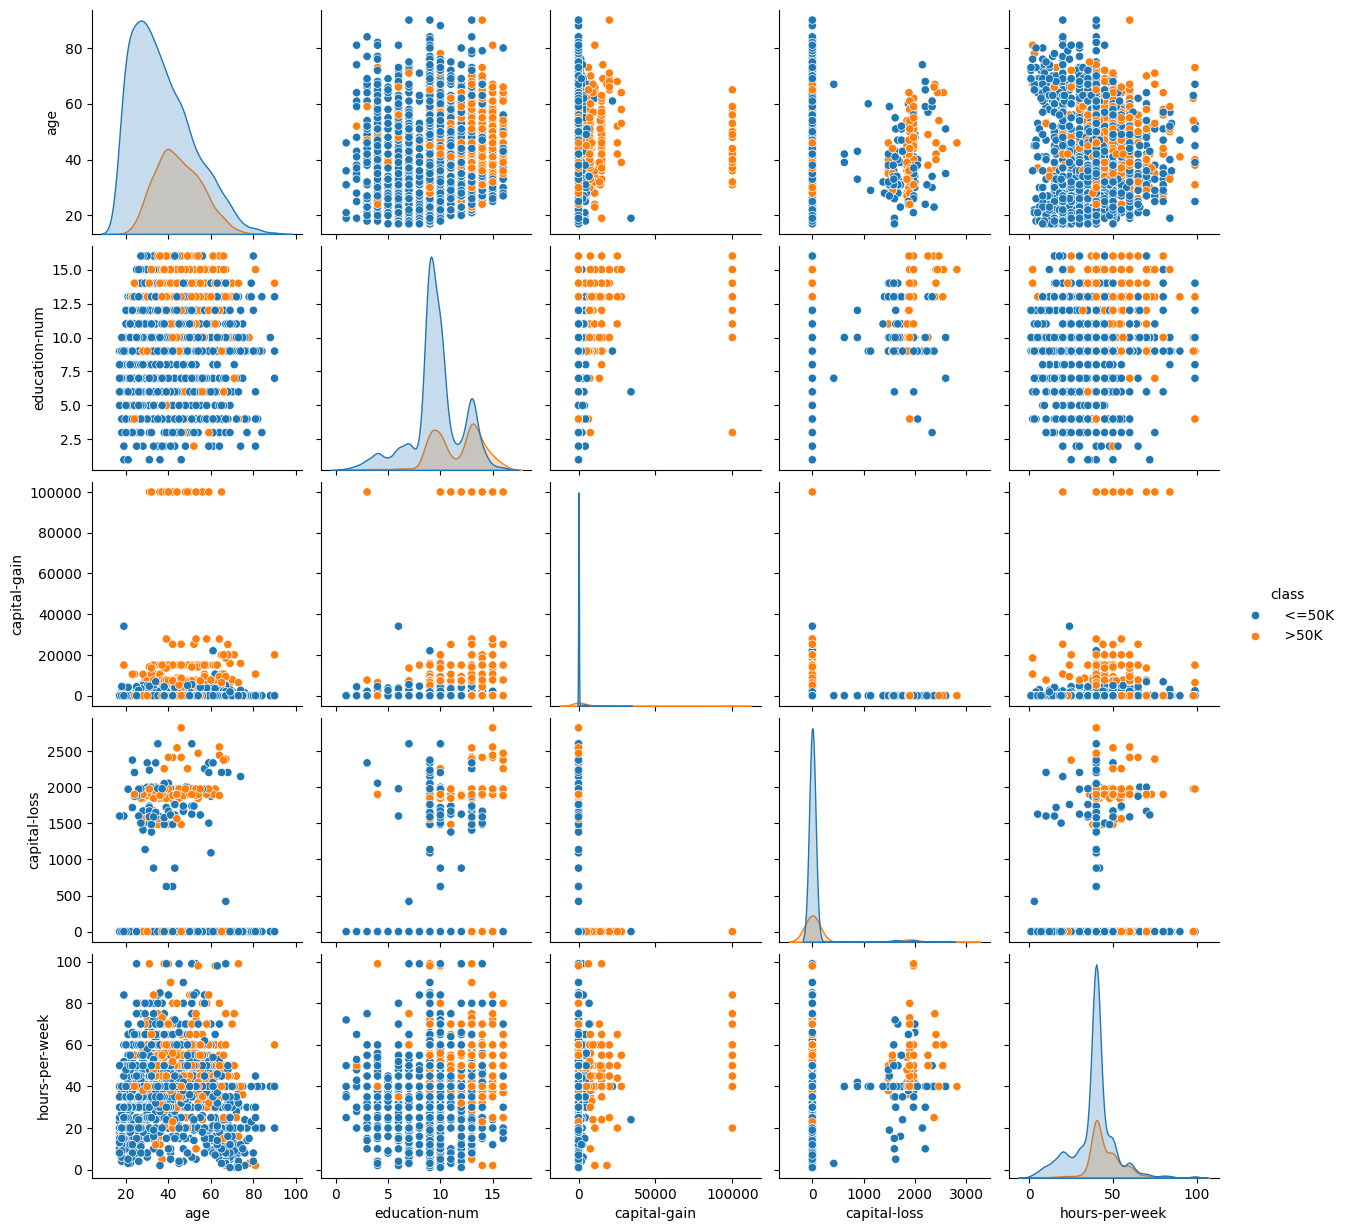

In [4]:
import seaborn as sns

sns.pairplot(adult_census.sample(4000), hue='class')

The exploratory analysis with the pairplot indicates that:

 - Income has two big modalities of income 
 - Hours per week have a wider spread in the case of hours-per-week
 - The data does not show explicit linear relationships so it regular linear regressors might under perform.
 - Binary classifiers in the form of Trees/ Logistic Regressors could provide accurate class prediction

3. What does the following code does?

In [5]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), LogisticRegression())

data, target = adult_census.drop(columns="class"), adult_census["class"]

from sklearn.model_selection import cross_validate

cv_results_logistic_regression = cross_validate(
    classifier, data, target, cv=cv, n_jobs=2
)

test_score_logistic_regression = pd.Series(
    cv_results_logistic_regression["test_score"], name="Logistic Regression"
)
test_score_logistic_regression


0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814831
6    0.813112
7    0.810368
8    0.812375
9    0.816306
Name: Logistic Regression, dtype: float64

4. What is the objective of the following lines with respect to the previous
work?

In [6]:
from sklearn.dummy import DummyClassifier

most_frequent_classifier = DummyClassifier(strategy="most_frequent")
cv_results_most_frequent = cross_validate(
    most_frequent_classifier, data, target, cv=cv, n_jobs=2
)
test_score_most_frequent = pd.Series(
    cv_results_most_frequent["test_score"],
    name="Most frequent class predictor",
)
test_score_most_frequent

0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: Most frequent class predictor, dtype: float64

> R: The main objective is to find the most frequent response in the dataset and observe if this could be a good predictor, this is done by doing a count values on the y value and taking the most frequent response as the correct answer. Then metrics can be computed over this.

5. By observing the results what can you conclude?

In [7]:
# solution
all_test_scores = pd.concat(
    [test_score_logistic_regression, test_score_most_frequent],
    axis="columns",
)
all_test_scores

,Logistic Regression,Most frequent class predictor
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814831,0.761885
6,0.813112,0.757463
7,0.810368,0.757176
8,0.812375,0.761885
9,0.816306,0.763114


> R: We observe that the two histograms are well separated. Therefore the dummy classifier with the strategy most_frequent has a much lower accuracy than the logistic regression classifier. We conclude that the logistic regression model can successfully find predictive information in the input features to improve upon the baseline.

4. Let consider the following added benchmarks with respect to Dummy Classifiers that use other kind of strategies.

- Stratified: The `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The predict method returns the class label which got probability one in the one-hot vector of predict_proba
- Uniform: Generates predictions uniformly at random from the list of unique classes observed in `y`

What could be more convenient to evaluate and why?

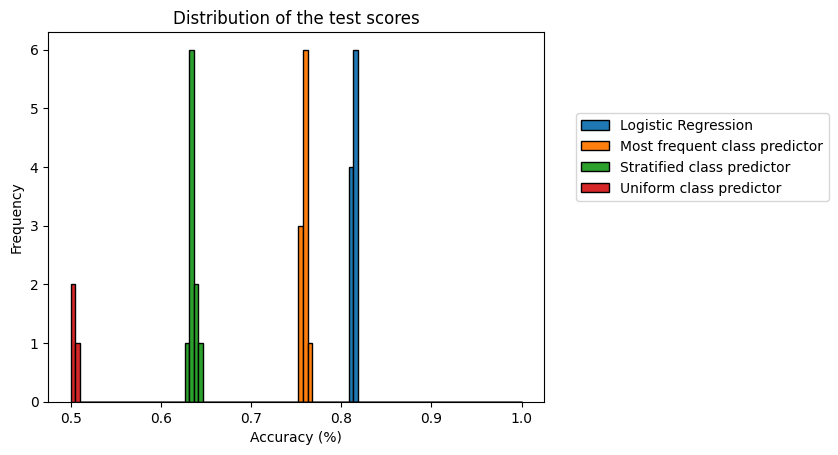

In [8]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(start=0.5, stop=1.0, num=100)

stratified_dummy = DummyClassifier(strategy="stratified")
cv_results_stratified = cross_validate(
    stratified_dummy, data, target, cv=cv, n_jobs=2
)
test_score_dummy_stratified = pd.Series(
    cv_results_stratified["test_score"], name="Stratified class predictor"
)
uniform_dummy = DummyClassifier(strategy="uniform")
cv_results_uniform = cross_validate(
    uniform_dummy, data, target, cv=cv, n_jobs=2
)
test_score_dummy_uniform = pd.Series(
    cv_results_uniform["test_score"], name="Uniform class predictor"
)
all_test_scores = pd.concat(
    [
        test_score_logistic_regression,
        test_score_most_frequent,
        test_score_dummy_stratified,
        test_score_dummy_uniform,
    ],
    axis="columns",
)
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the test scores")

> R: We see that using strategy="stratified", the results are much worse than with the most_frequent strategy. Since the classes are imbalanced. This is even more so for the strategy="uniform": this strategy assigns class labels uniformly at random.

# Fin